In [166]:
---
Title: Lab_1
author: Emily_Goodman
format: 
  html:
    code-fold: true
    toc: true
Theme: lux
embed-resources: true
---

SyntaxError: invalid syntax (2418374930.py, line 2)

In [9]:
pip install plotnine



   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.3 MB 8.5 MB/s eta 0:00:01
   ----------------------------- ---------- 0.9/1.3 MB 8.5 MB/s eta 0:00:01
   ----------------------------------- ---- 1.1/1.3 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/127.4 kB ? eta -:--:--
   ---------------------------------------- 127.4/127.4 kB 7.3 MB/s eta 0:00:00

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.6 MB/s eta 0:00:01
   -------------------- ---------------

In [1]:
import pandas as pd
from plotnine import *

# Task one

### In Task one the aesthetics maped are Income as the x variable, Life expectancy as the y variable, Population as the size variable, and Region of map as the color variable. The data is also filtered to only show data for the yer 2010. They are mapped as a scatter plot with size as a variable also known as a bubble plot. 

In [4]:
q1data= pd.read_csv("data\q1data.csv")
q1data.head()

<positron-console-cell-4>:1: SyntaxWarning: invalid escape sequence '\q'


,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [157]:
data2010 = q1data[q1data['year']==2010]
data2010=data2010.sort_values(by='income',ascending=False)


In [158]:
colors= {
    'americas': '#2bf528',
    'africa': '#60e1fb',
    'europe': '#fafc50',
    'asia': '#f22a42'
}

C:\Users\emily\anaconda3.1\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


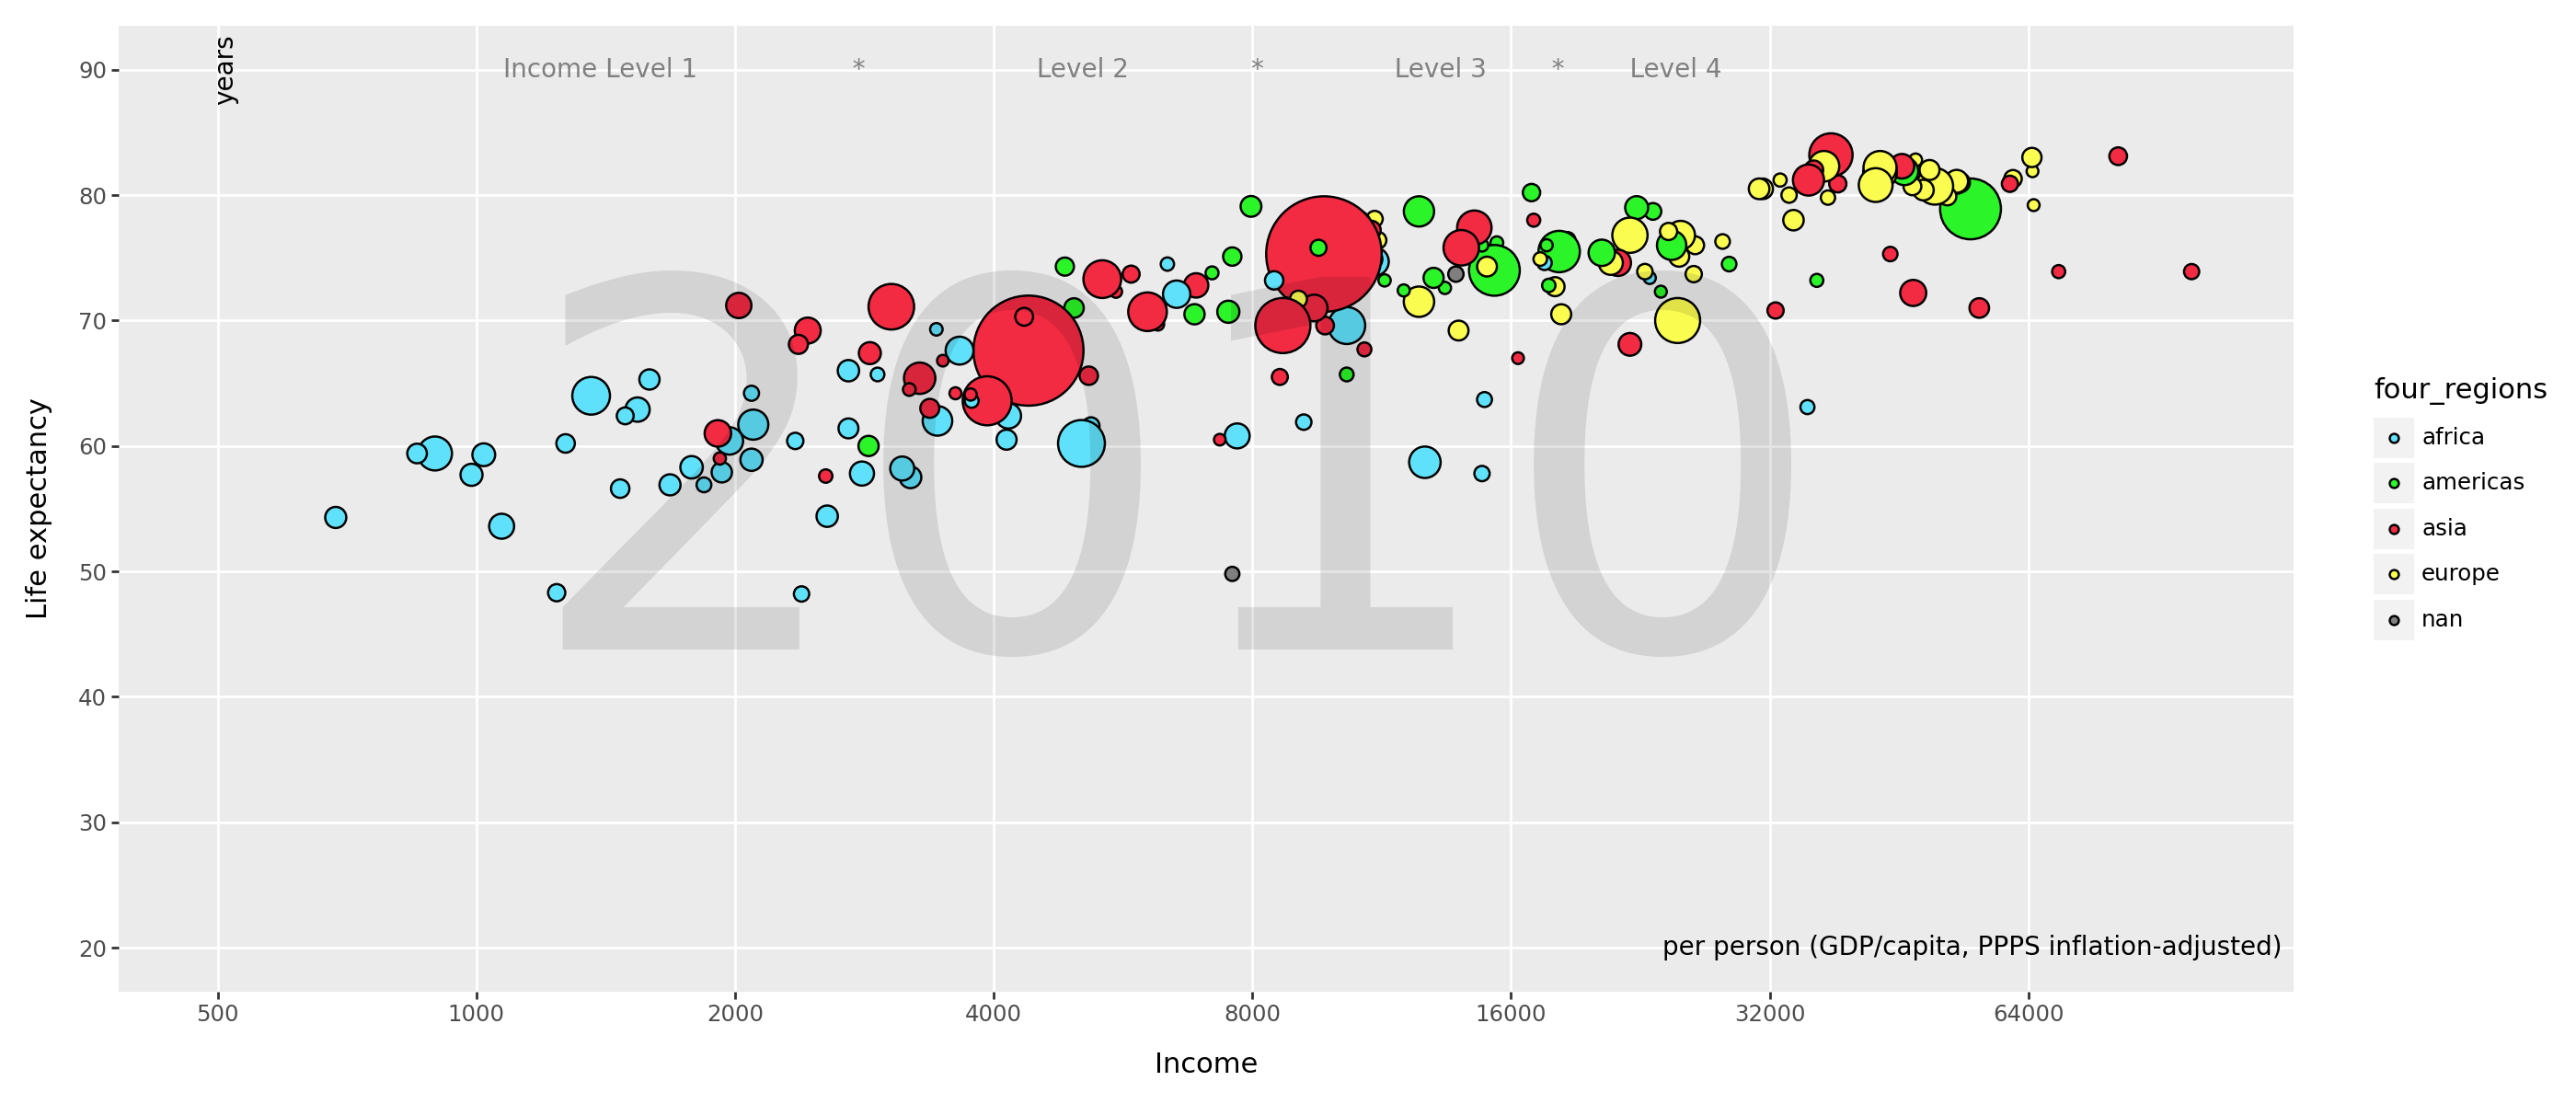

In [159]:
(ggplot(data2010,
       aes(
         x='income',
         y='life_exp',
         size='population',
         fill='four_regions'
       ))
 + geom_point()
 + labs(x="Income", y="Life expectancy")
 + scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], limits=(500, 100000))
 + scale_size(range=(2, 25))
 + guides(size='none')
 + scale_y_continuous(breaks=[20, 30, 40, 50, 60, 70, 80, 90], limits=(20, 90))
 + annotate("text", x=6500, y=55, label="2010", size=200, color="black", alpha=.1)
 + theme(figure_size=(14,6), panel_grid_minor=element_blank())
 + scale_fill_manual(values=colors)
 + annotate("text", x=55000, y=20, label="per person (GDP/capita, PPPS inflation-adjusted)", size=10, color="black")
+ annotate("text", x=510, y=90, label="years", size=10, color="black", angle=90)
+ annotate("text", x=5500, y=90, label="Income Level 1                   *                     Level 2               *                Level 3        *        Level 4", size=10, color="grey",)
)

C:\Users\emily\anaconda3.1\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 2 rows containing non-finite values.


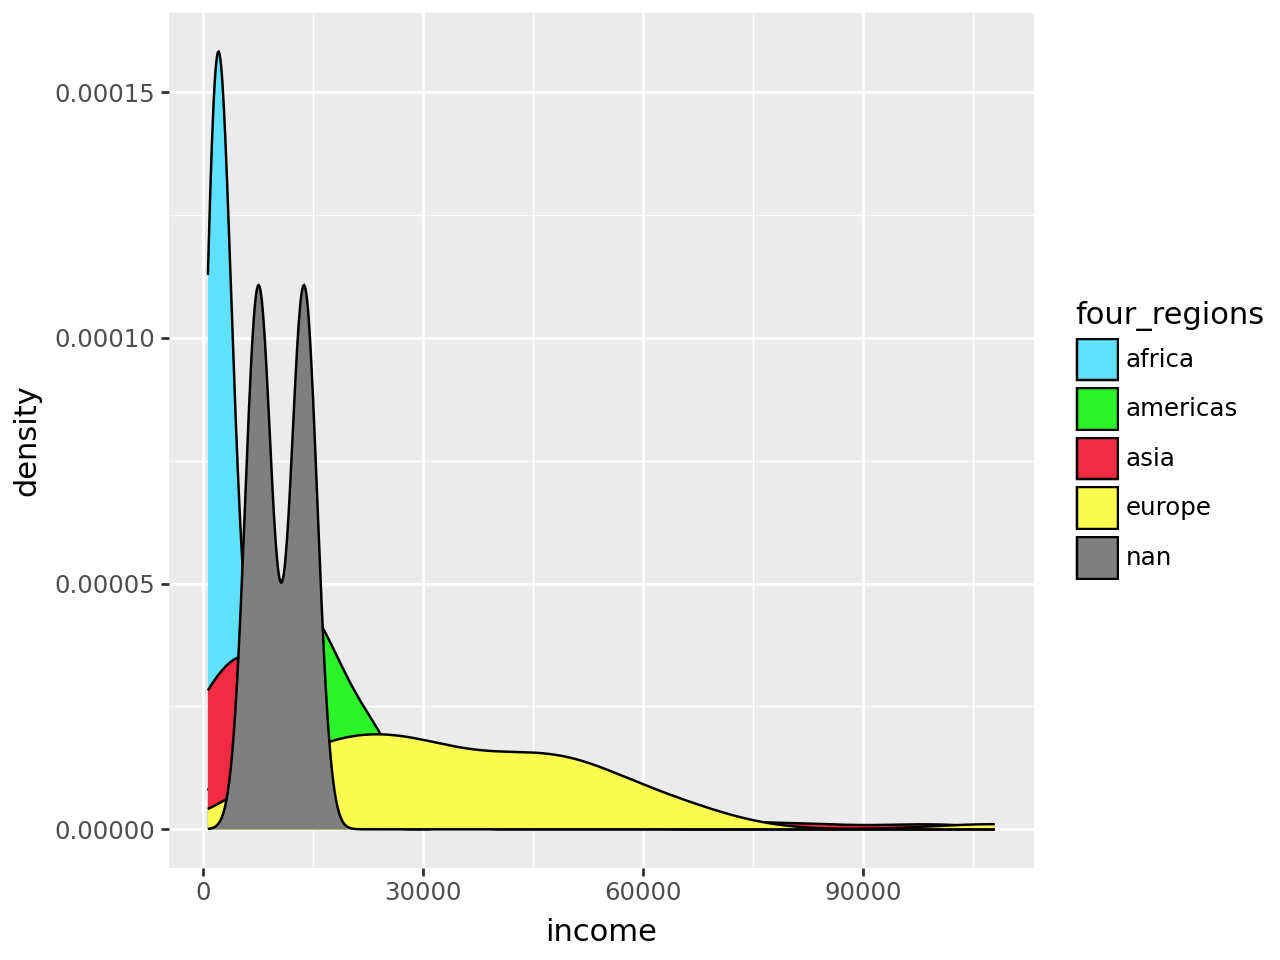

In [57]:
(ggplot(data2010,
aes(
  x = "income",
  fill = "four_regions"
))
+ geom_density()
+ scale_fill_manual(values=colors)
)

A reason why this plot wont work is because it doesn't follow the geometry of the map we are try to copy. It also only shows 2 out of the four aesthetics we are trying to map. Overall it is a poor way to plot the data since it lacks the story we are trying to show.

# Task 2

### In Task two the aesthetics maped are Exports as the x variable, Imports as the y variable, Energy as the size variable, and Region of map as the color variable. Additionally, the data is filtered by the year 1997. They are mapped as a scatter plot with size as a variable also known as a bubble plot. 

In [134]:
q2data= pd.read_csv("data\q2data.csv")
q2data.head()

<positron-console-cell-134>:1: SyntaxWarning: invalid escape sequence '\q'


,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [153]:
data1997 = q2data[q2data['year']==1997]
data1997["energy"] = data1997["energy"].astype(str)
data1997["energy"] = data1997['energy'].str.replace('k',"").astype(float)*1000
data2= data1997.dropna()
data2
data2['energy']= data2['energy'].astype(float)
data2=data2.sort_values(by='energy',ascending=False)



<positron-console-cell-153>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


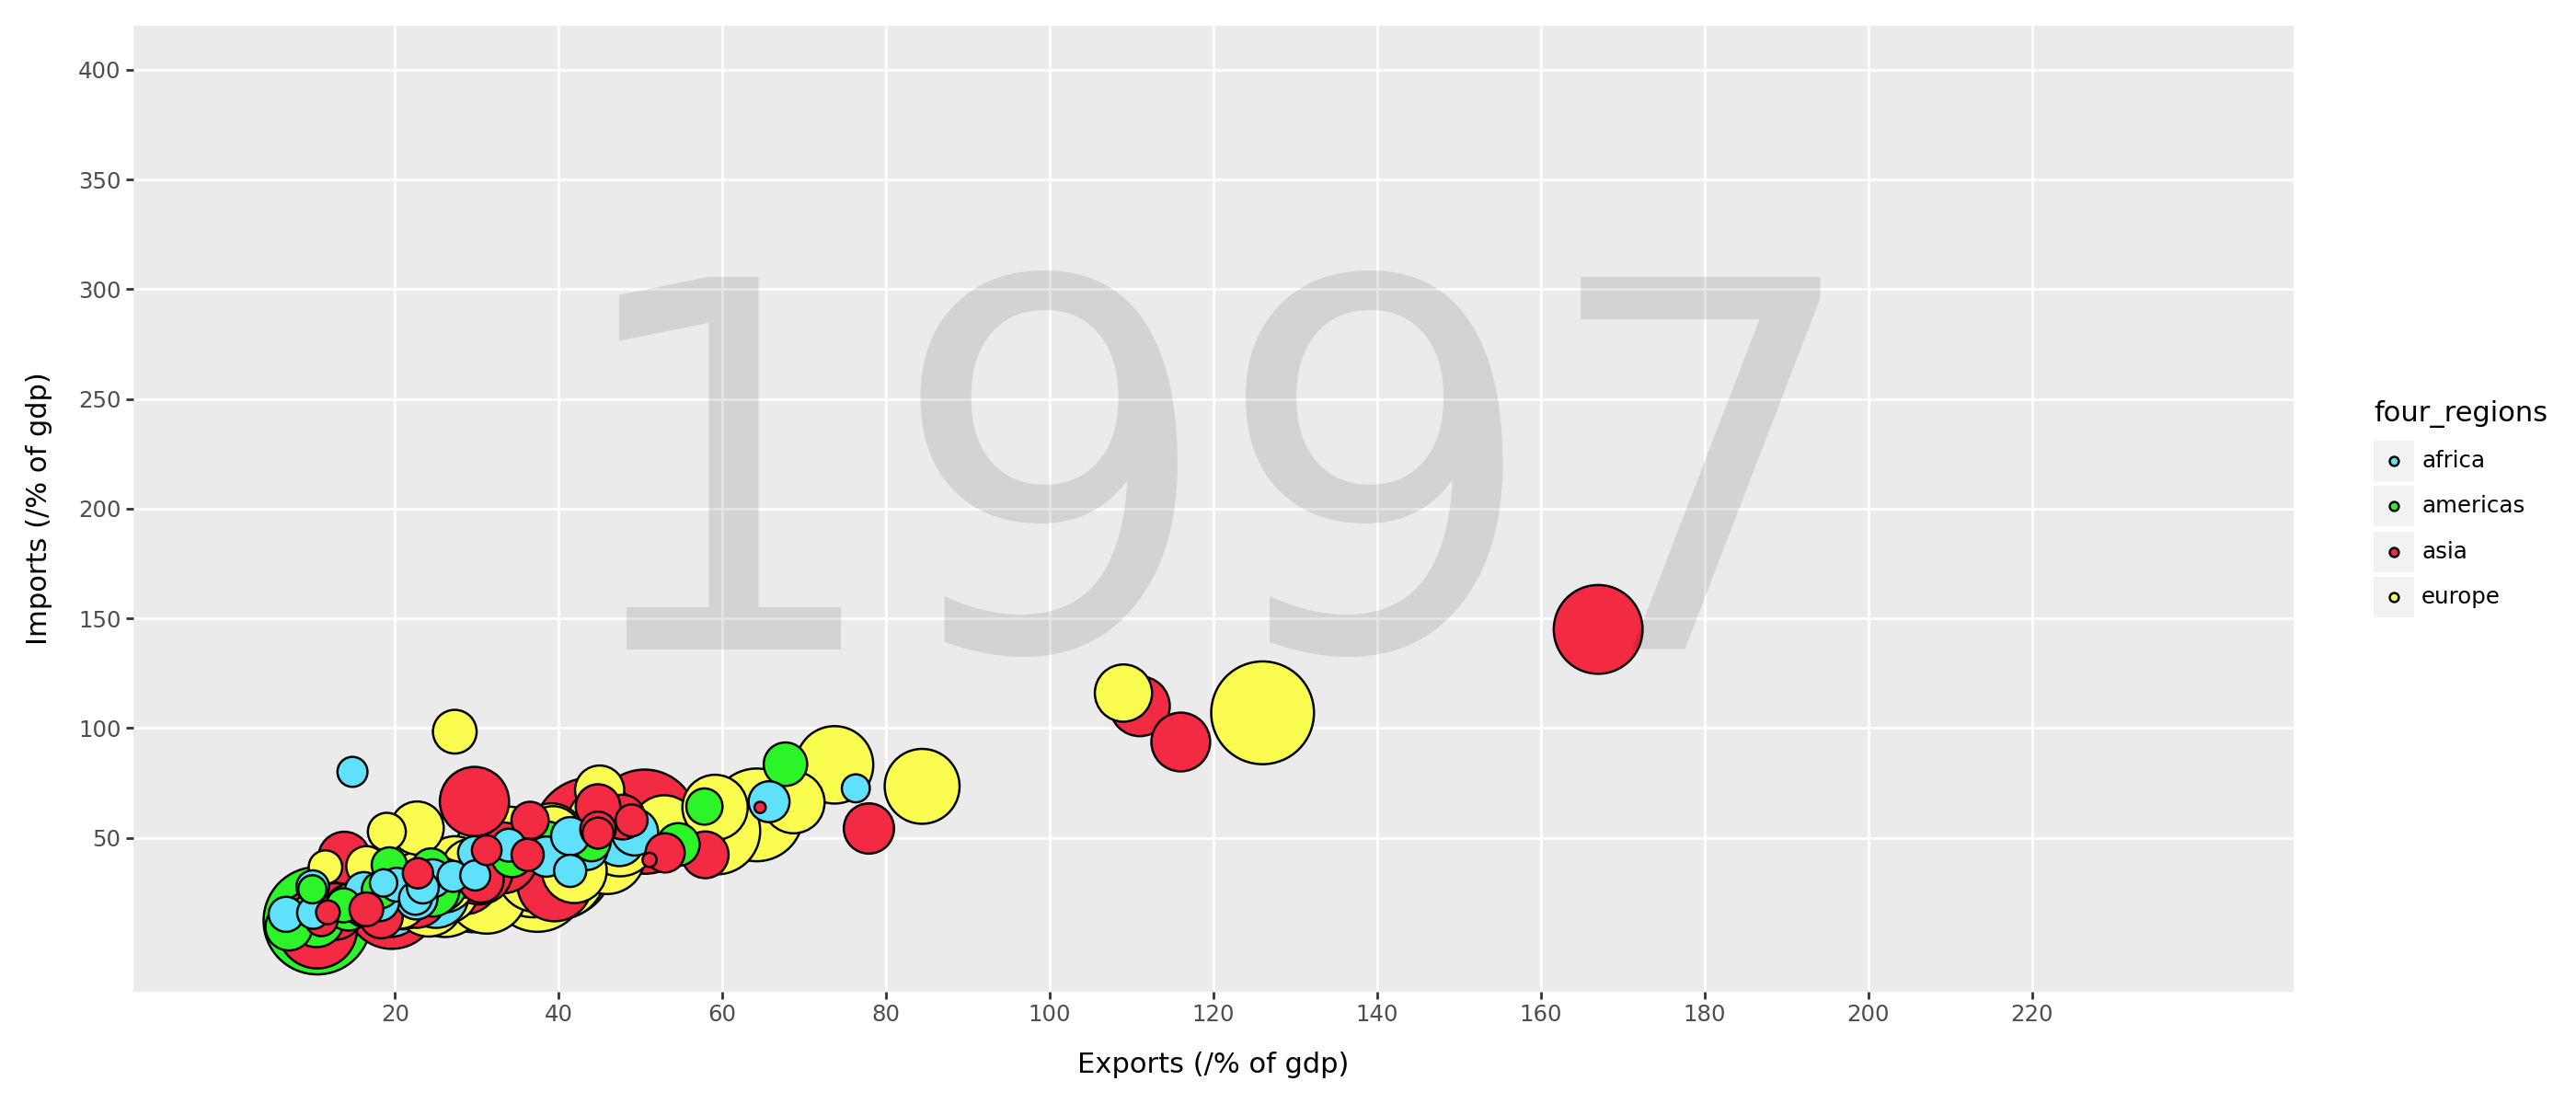

In [154]:
(ggplot(data2,
       aes(
         x='exports',
         y='imports',
         size='energy',
         fill='four_regions'
       ))
 + geom_point()
 + scale_size(range=(2, 25))
 + guides(size='none')
 + labs(x="Exports (/% of gdp)", y="Imports (/% of gdp)")
 + guides(size='none')
 + annotate("text", x=120, y=200, label="1997", size=200, color="black", alpha=.1)
 + theme(figure_size=(14,6), panel_grid_minor=element_blank())
 + scale_fill_manual(values=colors)
 + scale_y_continuous(breaks=[50, 100, 150, 200, 250, 300, 350, 400], limits=(0, 400))
 + scale_x_continuous(breaks=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220], limits=(00, 240))
 )


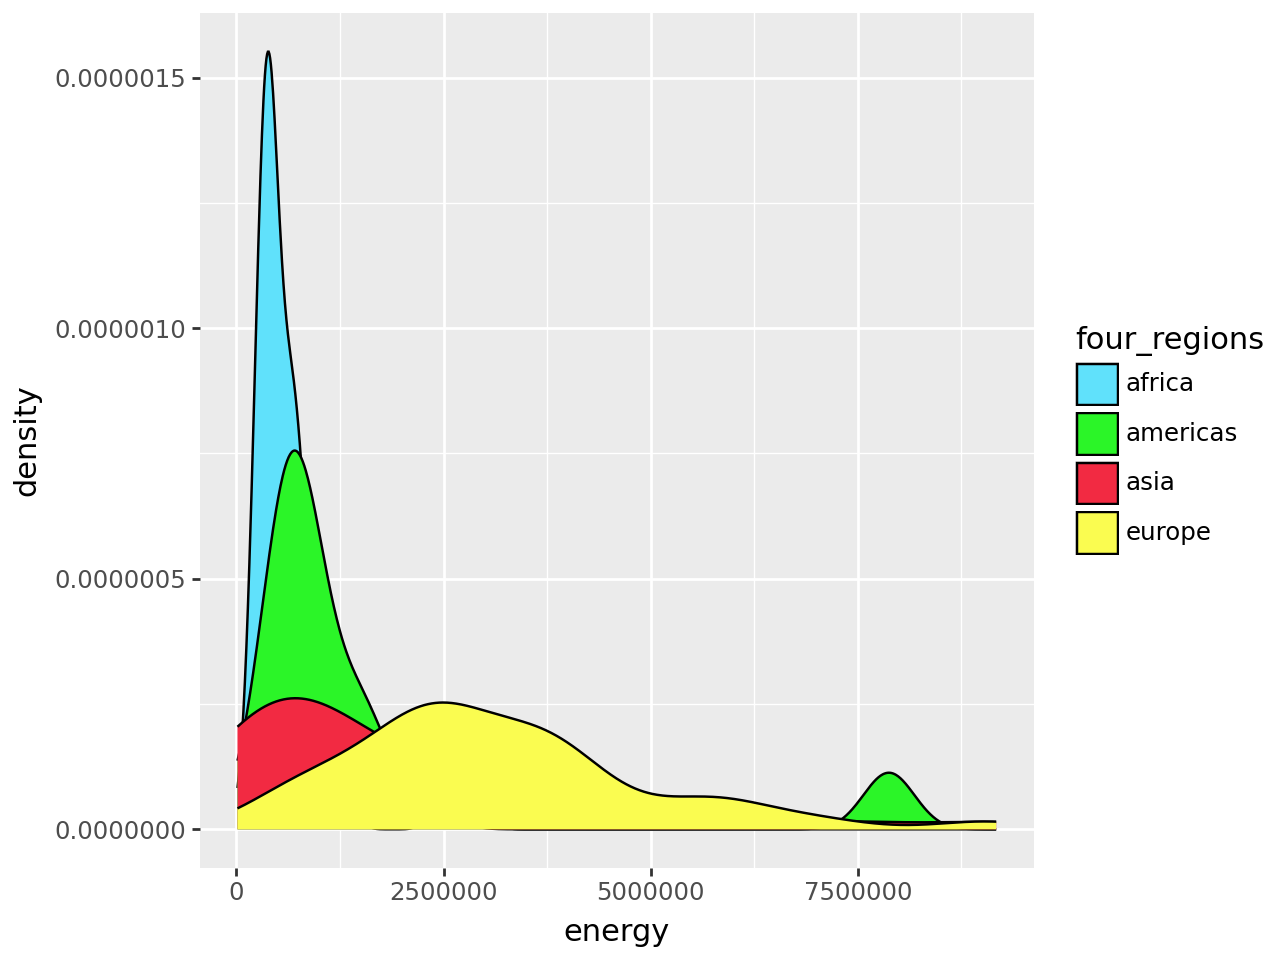

In [160]:
(ggplot(data2,
aes(
  x = "energy",
  fill = "four_regions"
))
+ geom_density()
+ scale_fill_manual(values=colors)
)

A reason why we shouldn't use the plot above is because it only shows energy consumption counts by country. It doesnt show every aesthetics we are trying to copy from the orignal graph. It lacks crucial information that tells the whole story. 

# Task 3

###  In Task Three the aesthetics maped are Indviduals using the Internet as the x variable, GDP as the y variable, Income as the size variable, and Region of map as the color variable. Another aesthetic is the year 2001, so the data is filtered to only show data from that year. They are mapped as a scatter plot with size as a variable also known as a bubble plot. 

In [109]:
q3= pd.read_csv("data\q3data.csv")
q3.head()

<positron-console-cell-109>:1: SyntaxWarning: invalid escape sequence '\q'


,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


In [155]:
q2001 = q3[q3['year']==2001]
q301= q2001.dropna()
q301
q301=q301.sort_values(by='internet_users',ascending=False)


C:\Users\emily\anaconda3.1\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
C:\Users\emily\anaconda3.1\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


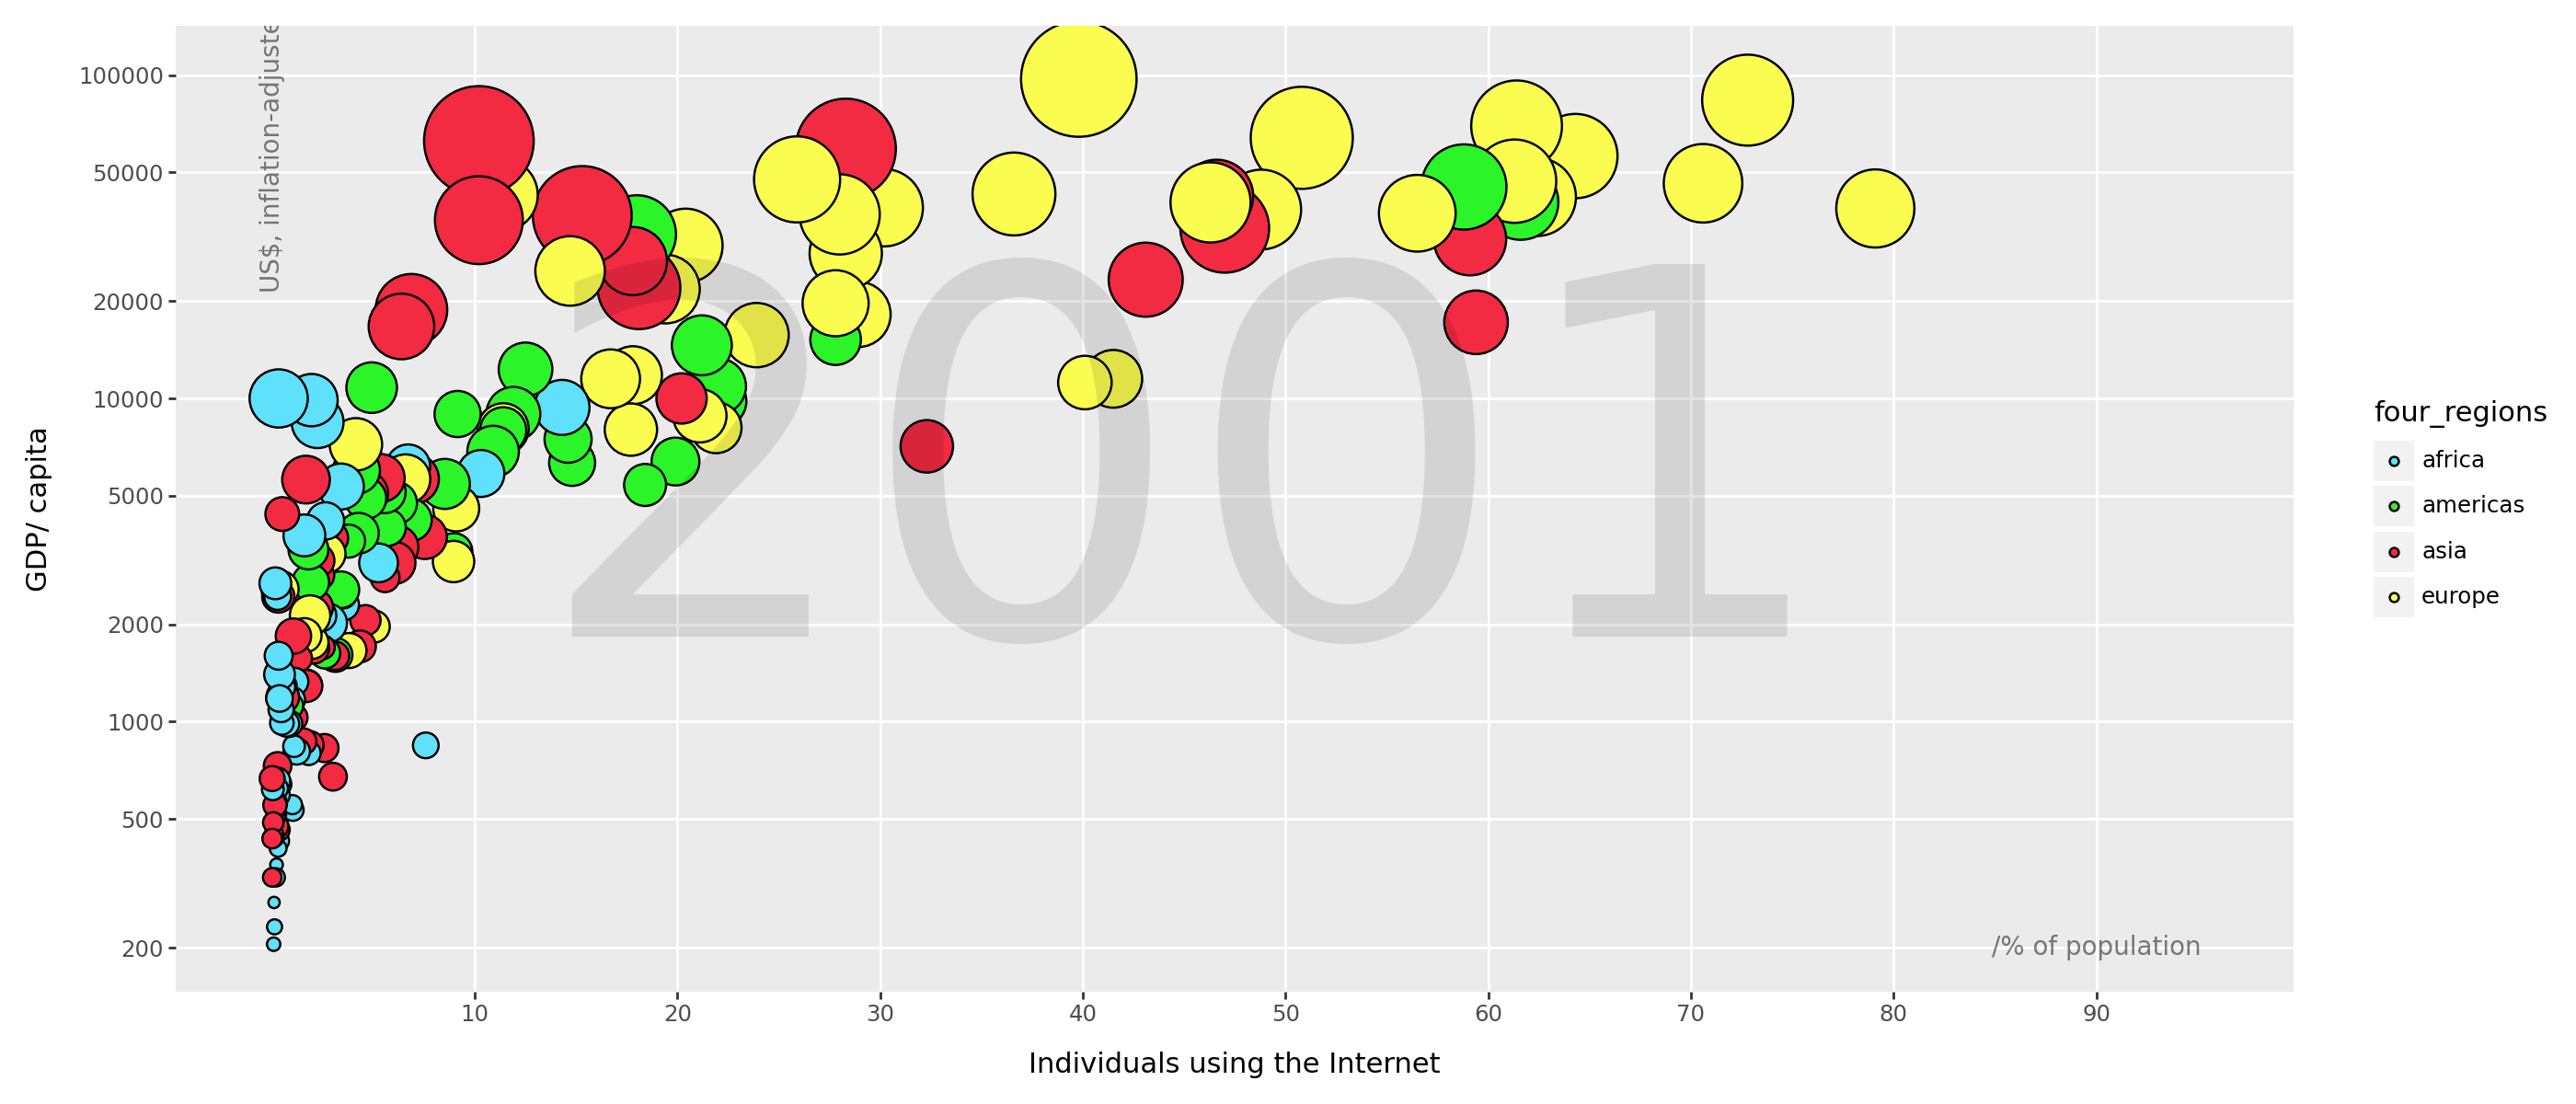

In [156]:
(ggplot(q301,
       aes(
         x='internet_users',
         y='gdp',
         size='income',
         fill='four_regions'
       ))
 + geom_point()
 + scale_size(range=(2, 25))
 + guides(size='none')
 + labs(x="Individuals using the Internet", y="GDP/ capita")
 + guides(size='none')
 + annotate("text", x=120, y=200, label="2001", size=200, color="black", alpha=.1)
 + theme(figure_size=(14,6), panel_grid_minor=element_blank())
 + scale_fill_manual(values=colors)
 + scale_x_continuous(breaks=[10,20,30,40,50,60,70,80,90], limits=(0, 95))
 + scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], limits=(200, 104000))
  + annotate("text", x=90, y=200, label="/% of population", size=10, color="black", alpha=.5)
  + annotate("text", x=0, y=60000, label="US$, inflation-adjusted", size=10, color="black", angle=90, alpha=.5)
  + annotate("text", x=45, y=5000, label="2001", size=200, color="black", alpha=.1)
 )


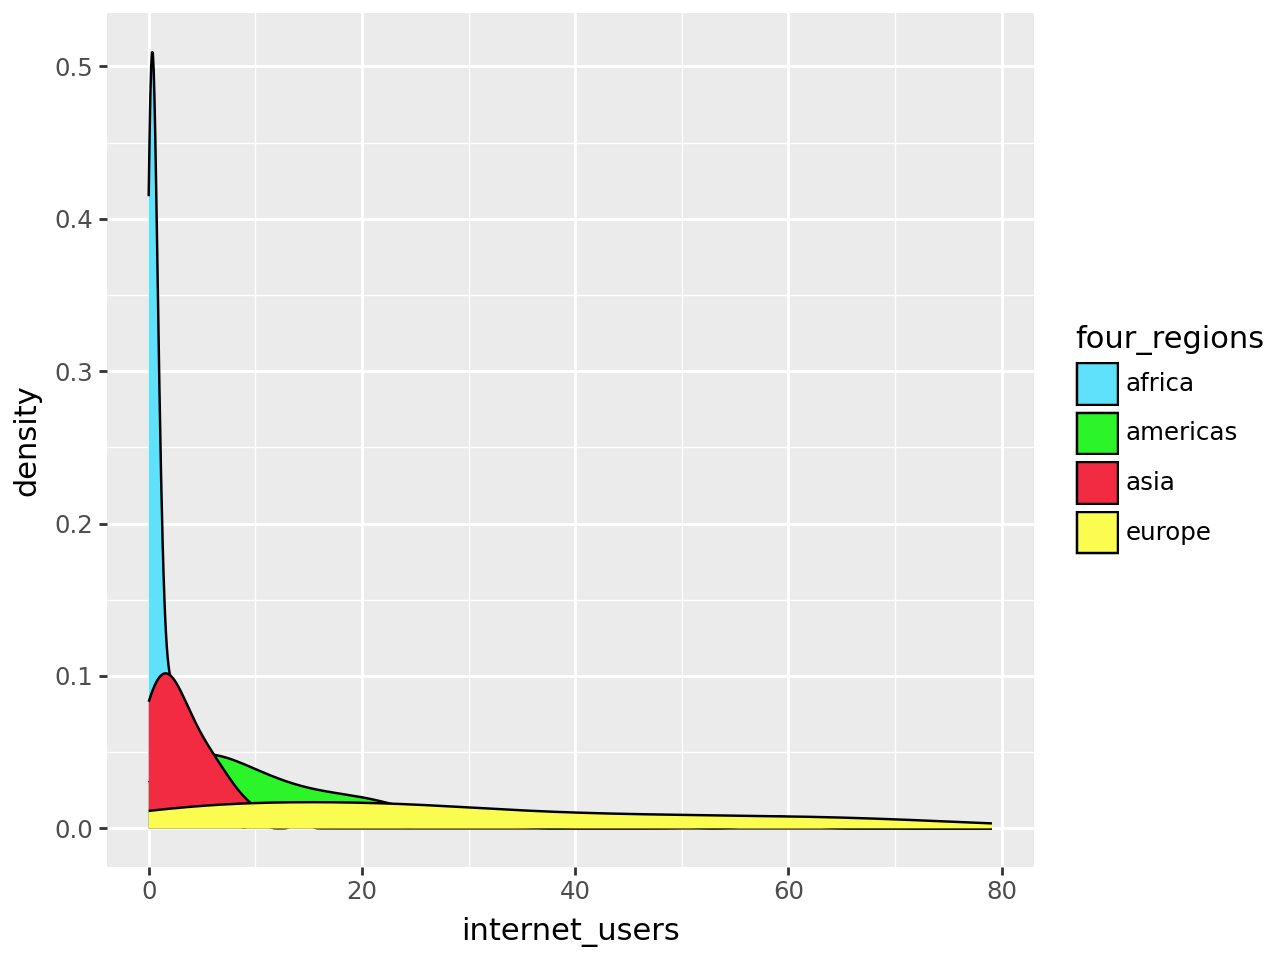

In [162]:
(ggplot(q301,
aes(
  x = "internet_users",
  fill = "four_regions"
))
+ geom_density()
+ scale_fill_manual(values=colors)
)

This plot doesn't work because it lack the neccessary information to show the whole story we want to describe. Right now it only shows the internet users count by count. It doesn't take into account income and GDP. Thus, using a density plot is subpar compared to a scatter plot with size and color as variables.